In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
class ItemProperties:
    COL_TIME_STAMP = "timestamp"
    COL_ITEM_ID = "itemid"
    COL_PROPERTY = "property"
    COL_VALUE = "value"

    @staticmethod
    def readFromFile():
        itemProperties1DF:DataFrame = ItemProperties.__readFromFile("item_properties_part1.csv")

        itemProperties2DF:DataFrame = ItemProperties.__readFromFile("item_properties_part2.csv")

        return pd.concat([itemProperties1DF, itemProperties2DF])

    @staticmethod
    def __readFromFile(fileName:str):
        itemPropertiesFile:str = ".." + os.sep + "datasets" + os.sep + "retailrocket" + os.sep + fileName

        itemPropertiesDF: DataFrame = pd.read_csv(itemPropertiesFile, sep=',', usecols=[0, 1, 2, 3], header=0, encoding="ISO-8859-1", low_memory=False)
        itemPropertiesDF.columns = [ItemProperties.COL_TIME_STAMP, ItemProperties.COL_ITEM_ID, ItemProperties.COL_PROPERTY, ItemProperties.COL_VALUE]

        return itemPropertiesDF



In [3]:
itemsDF = ItemProperties.readFromFile()

In [4]:
itemsDF.shape

(20275902, 4)

In [5]:
itemsDF.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [6]:
itemsDF[["property","value"]].describe()

,property,value
count,20275902,20275902
unique,1104,1966868
top,888,769062
freq,3000398,1537247


In [7]:
itemsDF.drop_duplicates(subset=["itemid","property"], keep='last', inplace=True)
itemsDF.shape

(12003814, 4)

In [8]:
countPropDF = itemsDF.groupby("property").count().sort_values("itemid")["itemid"]
countPropDF

property
782                1
57                 1
530                1
424                1
769                1
               ...  
764           417053
790           417053
888           417053
283           417053
categoryid    417053
Name: itemid, Length: 1104, dtype: int64

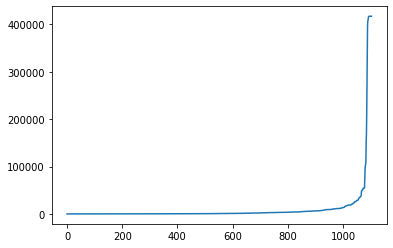

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(countPropDF.values)

In [10]:
countPropDF.describe([0.5, 0.75, 0.90, 0.95])

count      1104.000000
mean      10873.019928
std       50873.797814
min           1.000000
50%         757.500000
75%        4220.000000
90%       12108.400000
95%       26976.400000
max      417053.000000
Name: itemid, dtype: float64

In [11]:
countPropValDF = itemsDF.groupby(["property","value"]).count().sort_values("itemid")["itemid"]
countPropValDF

property   value        
994        689405                1
776        948239                1
           948235                1
           948232                1
           948230                1
                             ...  
28         150169 610517     67104
available  0                358038
764        1285872          417053
112        679677           417053
159        519769           417053
Name: itemid, Length: 2254737, dtype: int64

In [12]:
countPropValDF.describe([0.8, 0.9, 0.95, 0.99, 0.995, 0.999])

count    2.254737e+06
mean     5.323820e+00
std      5.608805e+02
min      1.000000e+00
50%      1.000000e+00
80%      1.000000e+00
90%      2.000000e+00
95%      3.000000e+00
99%      2.000000e+01
99.5%    6.100000e+01
99.9%    5.510000e+02
max      4.170530e+05
Name: itemid, dtype: float64

In [13]:
countPropValDFRed = countPropValDF.loc[(countPropValDF>10)&(countPropValDF<400000)]
countPropValDFRed.shape

(35841,)

In [14]:
countPropDFRed = countPropDF.loc[(countPropDF>5000)]
countPropDFRed.shape

(250,)

In [15]:
reducedFrequentProps = itemsDF.loc[itemsDF.property.isin(countPropDFRed.index)]
reducedFrequentProps.shape

(11186100, 4)

In [16]:
reducedFrequentValsProps = reducedFrequentProps.loc[reducedFrequentProps.value.isin(countPropValDFRed.index.get_level_values(1))]
reducedFrequentValsProps.shape

(7347870, 4)

In [17]:
availableItems = reducedFrequentProps.loc[(reducedFrequentProps.property == "available")&(reducedFrequentProps.value == "1"),"itemid"]  
availableItems.shape

(59015,)

In [18]:
from datetime import datetime
itemPropDict = {}
k = 0
time = datetime.now()
for i in reducedFrequentValsProps.iterrows():
    
    dct = itemPropDict.get(i[1].itemid,{})
    dct[i[1].property] = i[1].value
    itemPropDict[i[1].itemid] = dct
    
    if k % 100000 == 0:
        print(k)     
        print(datetime.now() - time)
        time = datetime.now()
    k = k+1
len(itemPropDict)

0
0:00:00.666002
100000
0:00:13.380033
200000
0:00:13.210001
300000
0:00:13.325011
400000
0:00:13.224001
500000
0:00:13.382996
600000
0:00:13.304013
700000
0:00:13.514990
800000
0:00:13.412001
900000
0:00:13.598058
1000000
0:00:14.717957
1100000
0:00:13.568992
1200000
0:00:13.562046
1300000
0:00:13.455956
1400000
0:00:13.675034
1500000
0:00:13.461013
1600000
0:00:13.346986
1700000
0:00:13.530965
1800000
0:00:13.543001
1900000
0:00:13.548033
2000000
0:00:13.383001
2100000
0:00:13.300967
2200000
0:00:13.378032
2300000
0:00:13.376965
2400000
0:00:13.557002
2500000
0:00:13.616999
2600000
0:00:13.737999
2700000
0:00:13.389001
2800000
0:00:13.654036
2900000
0:00:13.410966
3000000
0:00:13.433034
3100000
0:00:13.371005
3200000
0:00:13.307997
3300000
0:00:13.429996
3400000
0:00:13.572003
3500000
0:00:13.509966
3600000
0:00:13.645997
3700000
0:00:13.441038
3800000
0:00:13.368998
3900000
0:00:13.472001
4000000
0:00:13.510963
4100000
0:00:13.628038
4200000
0:00:13.531000
4300000
0:00:13.515961
440

417053

In [21]:
items = np.array(list(itemPropDict.keys()))
np.save("itemsRR.npy", items)
items[0:5]

array([460429,  89534, 264312, 264319, 348323])

In [22]:
items

array([460429,  89534, 264312, ..., 421100, 290971, 261092])

In [19]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=True)
matrix = v.fit_transform(itemPropDict.values())
matrix

<417053x44853 sparse matrix of type '<class 'numpy.float64'>'
	with 7347870 stored elements in Compressed Sparse Row format>

In [20]:
#availableItems.values
availableItemIDs = []
for i,j in enumerate(itemPropDict.keys()):
    if(j in availableItems.values):
        availableItemIDs.append(i)

len(availableItemIDs)

59015

In [22]:
from scipy.sparse import lil_matrix
from sklearn.metrics import pairwise_distances

mtx = lil_matrix((matrix.shape[0], matrix.shape[0]))
availableItemIDsArray = np.array(availableItemIDs)
time = datetime.now()

for i in range(matrix.shape[0]):
    dst = 1/(1+pairwise_distances(matrix[i],matrix[availableItemIDs])).flatten()
    kthLargest = np.partition(dst, -500)[-500]
    qualify = dst >= kthLargest
    filteredDST = dst[qualify]
    filteredIDX = availableItemIDsArray[qualify]
    mtx[i, filteredIDX] = filteredDST
    
    if i % 10000 == 0:
        print(i)
        print(datetime.now() - time)
        time = datetime.now()
    
mtx    

0
-1 day, 23:59:59.968999
10000
-1 day, 23:55:01.116972
20000
-1 day, 23:54:48.610999
30000
-1 day, 23:54:40.119155
40000
-1 day, 23:54:35.186027
50000
-1 day, 23:54:41.303467
60000
-1 day, 23:54:38.223842
70000
-1 day, 23:54:39.915731
80000
-1 day, 23:54:38.545406
90000
-1 day, 23:54:35.721788
100000
-1 day, 23:54:28.579882
110000
-1 day, 23:54:24.640387
120000
-1 day, 23:54:25.822144
130000
-1 day, 23:54:18.927079
140000
-1 day, 23:54:29.348282
150000
-1 day, 23:54:16.882330
160000
-1 day, 23:54:12.250397
170000
-1 day, 23:54:14.597853
180000
-1 day, 23:53:58.930743
190000
-1 day, 23:51:56.609387
200000
-1 day, 23:53:02.438202
210000
-1 day, 23:53:51.166907
220000
-1 day, 23:53:50.744288
230000
-1 day, 23:53:35.087175
240000
-1 day, 23:53:40.187360
250000
-1 day, 23:53:39.486903
260000
-1 day, 23:53:27.219938
270000
-1 day, 23:53:16.444691
280000
-1 day, 23:53:22.700323
290000
-1 day, 23:53:20.934381
300000
-1 day, 23:53:10.009571
310000
-1 day, 23:53:18.329483
320000
-1 day, 23:53:0

<417053x417053 sparse matrix of type '<class 'numpy.float64'>'
	with 281460045 stored elements in List of Lists format>

In [23]:
mtx.setdiag(0)
mtx = mtx.tocsr()

In [25]:
mtx

<417053x417053 sparse matrix of type '<class 'numpy.float64'>'
	with 281460045 stored elements in Compressed Sparse Row format>

In [26]:
from scipy.sparse import save_npz
save_npz("simMatrixRR.npz", mtx)

# Usage of the matrix

In [47]:
cbDataPath = "../data/simMatrixRR.npz"
import scipy.sparse

if "simMatrixRR.npz" in cbDataPath:
            sparseMat = scipy.sparse.load_npz(cbDataPath)
            sparseMat = sparseMat.transpose()
            #sparseMat.setdiag(0)
            itemIDs = np.load(cbDataPath.replace("simMatrixRR.npz","itemsRR.npy"))
            #dfCBSim = pd.SparseDataFrame(sparseMat, columns=itemIDs , index=itemIDs)¨#alternativa pro pandas <= 1.0
            cbData = pd.DataFrame.sparse.from_spmatrix(sparseMat, columns=itemIDs , index=itemIDs)
cbData.shape         

(417053, 417053)

In [53]:
results = cbData.loc[:,[260768]]
results.shape

(417053, 1)

In [54]:
results.fillna(0.0)

,260768
460429,0.0
89534,0.0
264312,0.0
264319,0.0
348323,0.0
...,...
146144,0.0
362987,0.0
421100,0.0
290971,0.0


In [55]:
results = np.mean(results, axis=1)
results

460429    0.0
89534     0.0
264312    0.0
264319    0.0
348323    0.0
         ... 
146144    0.0
362987    0.0
421100    0.0
290971    0.0
261092    0.0
Length: 417053, dtype: float64

In [56]:
results.sort_values(ascending=False, inplace=True)
results

128749    0.224009
299321    0.224009
309349    0.224009
287133    0.210897
59709     0.205213
            ...   
14073     0.000000
42127     0.000000
246425    0.000000
228309    0.000000
460429    0.000000
Length: 417053, dtype: float64

In [57]:
len(results.to_numpy().nonzero()[0])

511

# Reducing events dataset

In [61]:
COL_TIME_STAMP = "timestamp"
COL_VISITOR_ID = "visitorid"
COL_EVENT = "event"
COL_ITEM_ID = "itemid"
COL_TRANSACTION_ID = "transactionid"

def readFromFileEvents():
        eventsFile: str = ".." + os.sep + "datasets" + os.sep + "retailrocket" + os.sep + "events.csv"

        eventsDF: DataFrame = pd.read_csv(eventsFile, sep=',', usecols=[0, 1, 2, 3], header=0, encoding="ISO-8859-1", low_memory=False)
        eventsDF.columns = [COL_TIME_STAMP, COL_VISITOR_ID, COL_EVENT, COL_ITEM_ID]
        return eventsDF

In [62]:
eventsDF = readFromFileEvents()

In [63]:
eventsDF.head()

,timestamp,visitorid,event,itemid
0,1433221332117,257597,view,355908
1,1433224214164,992329,view,248676
2,1433221999827,111016,view,318965
3,1433221955914,483717,view,253185
4,1433221337106,951259,view,367447


In [67]:
eventsDF = eventsDF.loc[eventsDF.event == "view"]

In [71]:
eventsDF.shape

(2664312, 4)

In [68]:
countEvents = eventsDF.groupby("visitorid")["event"].count()
countEvents

visitorid
0          3
1          1
2          8
3          1
4          1
          ..
1407575    1
1407576    1
1407577    1
1407578    1
1407579    1
Name: event, Length: 1404179, dtype: int64

In [82]:
(countEvents.shape, countEvents.loc[countEvents>1].shape)

((1404179,), (396449,))

In [83]:
restrEvents = countEvents.loc[countEvents>1]

In [84]:
restrictedIDs = list(restrEvents.index)

In [89]:
eventsDFReduced = eventsDF.loc[(eventsDF.visitorid.isin(restrictedIDs))]
eventsDFReduced.shape

(1656582, 4)

In [90]:
eventsDFReduced.to_csv("eventsReduced.csv", sep=",", header=True, index=False)